# Some Time Series Concepts

## Lags

In the context of time series analysis, **lag** refers to the position of a previous observation in a data sequence relative to a current observation. It's a measure of temporal distance often used to assess the relationship between observations in a time series.

### Definition of Lag

A **lag** is essentially a delay between two points in a time series. When we talk about "lag k," we are referring to the value of the series at time \(t-k\). This concept is critical when analyzing how past values influence current values.


### Example of Lag



Imagine a time series that tracks the daily temperature of a city. If today's temperature is 20°C and yesterday's was 15°C, and we are interested in comparing today's temperature with that of previous days, we could use lags to do this:

- **Lag 1**: The temperature one day before today (yesterday's temperature). For instance, if today is July 5th, Lag 1 would refer to the temperature on July 4th.
- **Lag 2**: The temperature two days before today. Using the same example, Lag 2 would refer to the temperature on July 3rd.

### Practical Use of Lag in Time Series Analysis

Lags are widely used in time series modeling to construct features for statistical models:

- **Autocorrelation Function (ACF)**: This is a tool used to quantify the strength of the relationship between observations and their lags. It helps in identifying the degree to which current values in the series are related to past values. For example, using ACF, we could determine if today’s temperature is correlated with temperatures from 1 day ago, 2 days ago, etc.

- **Building Predictive Models**: In models like ARIMA (Autoregressive Integrated Moving Average), the concept of lag is integral. In an ARIMA model, the term AR(p) indicates that the model uses the dependent relationship between an observation and a specified number of lagged observations (p lags).

Lag allows analysts to incorporate memory into predictive models, which is essential for capturing the time-dependent nature of the data. By understanding how past values influence the present, better forecasts and insights can be generated from the time series data.

## Unit Roots

A **unit root** in a time series is a feature that can cause issues with certain types of statistical analyses. Specifically, a unit root means that the time series is non-stationary, which means its statistical properties like the mean, variance, and autocorrelation structure could change over time. When a time series has a unit root, it shows a systematic pattern that can be described by a stochastic trend.

### Unit Roots Explained

A time series has a unit root if the value of an autoregressive parameter is exactly equal to one. Consider an autoregressive model of order 1, AR(1):

$$
x_t = \phi x_{t-1} + \epsilon_t
$$

If $ \phi = 1 $, then the series is said to have a unit root. This model would then be:

$$
x_t = x_{t-1} + \epsilon_t
$$

A unit root implies that shocks to the time series have a permanent effect, which makes forecasting and statistical analysis more complex, as the series does not revert back to a long-term mean and the variance increases over time.

### Determining the Presence of a Unit Root

The most common method to test for a unit root is to use statistical hypothesis testing, where the most commonly used tests are:

1. **Dickey-Fuller (DF) Test**: Tests whether an AR(1) model has a unit root.
2. **Augmented Dickey-Fuller (ADF) Test**: An extension of the DF test that can handle more complex models with higher-order autoregressive processes.
3. **Phillips-Perron (PP) Test**: Adjusts the DF test to account for autocorrelation and heteroscedasticity in the residuals.
4. **KPSS Test**: Here, the null hypothesis is trend stationarity rather than the presence of a unit root.

### The ADF Test

The ADF test introduces lagged differences of the series into the DF regression to account for higher-order serial correlation:

$$
\Delta x_t = \alpha + \beta t + \gamma x_{t-1} + \delta_1 \Delta x_{t-1} + \cdots + \delta_p \Delta x_{t-p} + \epsilon_t
$$

Where $ \Delta $ is the difference operator, and $ p $ is the number of lagged difference terms included. 

The null hypothesis $ H_0: \gamma = 0 $ implies the presence of a unit root.

### Hypotheses in ADF Test

- **Null Hypothesis (H0)**: The series has a unit root (is non-stationary).
- **Alternative Hypothesis (H1)**: The series does not have a unit root (is stationary).

### Importance of Unit Root Testing


If you have a non-stationary time series, it can lead to unreliable statistical inferences. Therefore, testing for unit roots helps determine whether differencing the data (to achieve stationarity) is necessary before further analysis or forecasting. Differencing a non-stationary time series can help stabilize the mean, thus allowing for the use of various statistical modeling techniques.

In essence, unit root tests are fundamental in time series analysis as they help validate the assumptions of stationary required by many statistical models and are the first step in identifying the appropriate model for a given time series dataset.

## Covariance vs. Pearson Correlation

Pearson correlation and covariance are statistical measures used to evaluate the relationship between two variables. Let's explore these concepts theoretically, mathematically, and through Python code.

### Theoretical Explanation

1. **Covariance**: Covariance is a measure that indicates the extent to which two variables change in tandem. A positive covariance indicates that the two variables tend to increase or decrease together, whereas a negative covariance suggests that one variable tends to increase when the other decreases.

2. **Pearson Correlation**: Pearson correlation, also known as the Pearson correlation coefficient, is a measure of the linear relationship between two variables. It ranges from -1 to 1. A correlation of 1 means that there is a perfect positive linear relationship between variables, -1 means there is a perfect negative linear relationship, and 0 indicates no linear relationship between the two variables.

### When to Use Covariance

- **Measuring Relationship Direction and Scale**: Covariance is used when you want to determine the direction (positive or negative) of a linear relationship between two variables and the scale of this relationship. It tells you whether increasing values in one variable correspond with increasing values in the other (positive covariance), decreasing values in the other (negative covariance), or if there is no linear relationship (covariance near zero).

- **Joint Variability Understanding**: It is particularly useful in cases where the scale of variables is important, as covariance is sensitive to the units of measurement of the variables. This makes it valuable in situations where you are working with variables measured in the same units or when the magnitude of the relationship is of interest alongside the direction.

### When to Use Correlation

- **Standardized Measure of Relationship Strength**: Correlation is used when you need a standardized measure of the strength of the linear relationship between two variables. Since the Pearson correlation coefficient is dimensionless and always between -1 and 1, it provides a clear, interpretable metric regardless of the units of the variables.

- **Comparison of Different Datasets**: Because correlation is unitless, it allows for the comparison of the strength of relationships across different datasets or pairs of variables even if their scales differ dramatically.

### Mathematical Explanations

1. **Covariance**:
   The covariance between two random variables $X$ and $Y$ can be defined as:
   $$
   \text{Cov}(X, Y) = E\left[(X - \mu_X)(Y - \mu_Y)\right]
   $$
   where $E$ is the expected value operator, and $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively.

2. **Pearson Correlation**:
   The Pearson correlation coefficient between two variables $X$ and $Y$ is computed as:
   $$
   \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
   $$
   where $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively.

### Code Implementation in Python

In [10]:
import numpy as np
import pandas as pd

# Example data
data = {
    'X': [25, 30, 35, 40, 45],
    'Y': [78, 70, 65, 60, 58]
}
df = pd.DataFrame(data)

# Calculate Covariance
covariance = np.cov(df['X'], df['Y'])[0, 1]
print("Covariance:", covariance)

# Calculate Pearson Correlation
correlation = np.corrcoef(df['X'], df['Y'])[0, 1]
print("Pearson Correlation:", correlation)

Covariance: -62.49999999999999
Pearson Correlation: -0.9790755624849465



### Explanation of the Code

- **Data Creation**: We create a simple dataset with two variables, $X$ and $Y$, using Pandas DataFrame.
- **Covariance Calculation**: We use the `np.cov()` function from NumPy, which returns a covariance matrix. The covariance between $X$ and $Y$ is located at `[0, 1]` in this matrix.
- **Pearson Correlation Calculation**: We use the `np.corrcoef()` function from NumPy to compute the correlation matrix, and similarly, the correlation between $X$ and $Y$ is at `[0, 1]` in this matrix.

- **Covariance Analysis**: The **covariance** result of approximately (-62.5) indicates a strong negative relationship between $X$ and $Y$. This means that as $X$ increases, $Y$ tends to decrease. The magnitude of the covariance (-62.5) suggests that the variables are quite strongly linked, but it's important to note that the absolute value of covariance is not easily interpretable without context, as it is affected by the scale of the variables.

- **Pearson Correlation Analysis**: The **Pearson correlation coefficient** is approximately (-0.979), which is very close to (-1). This indicates a very strong negative linear relationship between the two variables. Essentially, this tells us that there is a nearly perfect inverse relationship between $X$ and $Y$; as one variable increases, the other decreases almost perfectly in a linear manner.

### Summary

In summary, covariance is suitable when you are interested in the direction and scale of the relationship between variables, particularly within the same dataset. Correlation is preferred when comparing the strengths of relationships across different datasets or when you need a standardized measure that is not affected by the units of measurement. Understanding these distinctions helps ensure that statistical analyses are both appropriate and meaningful.

## White Noise

### 1. Definition of White Noise


In the context of time series, **white noise** is a series of uncorrelated random variables, which means that no predictable pattern or trend can be discerned from the data.

### Why White Noise is Important in Time Series Analysis:

White noise serves as a critical benchmark. For a well-fitting time series model, whether it's an Autoregressive (AR), Moving Average (MA), Autoregressive Moving Average (ARMA), or Autoregressive Integrated Moving Average (ARIMA) model, the residuals should ideally behave like white noise. This means they would be normally distributed with a mean of zero and constant variance, indicating that the model has effectively captured the underlying data patterns without overfitting.

The residuals should also exhibit no autocorrelation. If the Autocorrelation Function (ACF) plot of the residuals displays significant spikes at non-zero lags, this could suggest that the time series model has not fully accounted for the dependence structure within the data. Such evidence would prompt further model refinement or perhaps the use of a different model order or type.

In essence, a robust time series model, regardless of its specific formulation, should account for the impact of past values and random disturbances on the current value of the series. A model that does this effectively will produce residuals that are indistinguishable from white noise, demonstrating that it has appropriately captured the temporal dependencies within the data.

### Main Characteristics of White Noise

- **Constant Mean and Variance**: The mean and variance are constant throughout the series, and it doesn’t follow any trends or seasonality.
- **No Autocorrelation**: There is no correlation between lagged terms; each value is independent of past values. The autocorrelation at lag zero is 1 (due to correlation with itself), and it is zero at all other lags.

### Mathematical Explanation

The mathematical definition of white noise can be summarized as follows:

A series $ \{X_t\} $ is considered white noise if:
- $ E(X_t) = \mu $ (the mean, $ \mu $, is constant),
- $ \text{Var}(X_t) = \sigma^2 $ (the variance, $ \sigma^2 $, is constant),
- $ \text{Cov}(X_t, X_{t-k}) = 0 $ for all $ k \neq 0 $ (no autocorrelation).

### Code Explanation

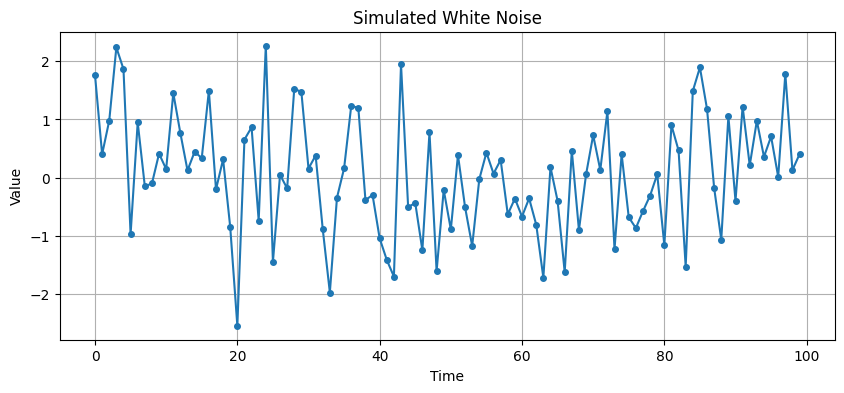

Mean of the series: 0.059808015534485
Variance of the series: 1.0158266192149312


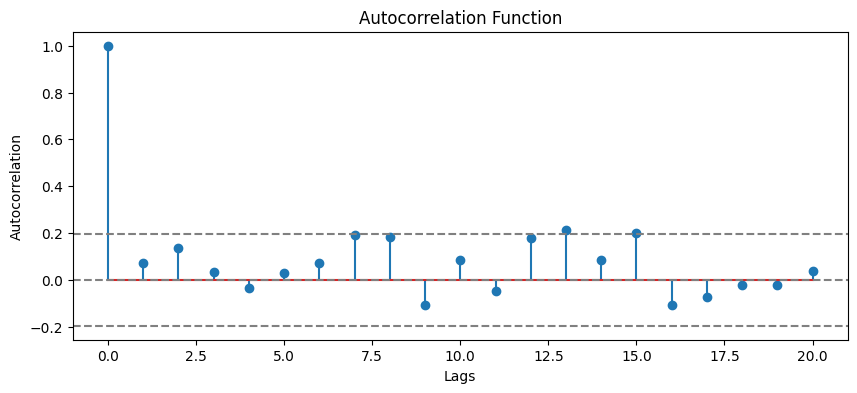

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate white noise data
np.random.seed(0)
data = np.random.normal(0, 1, 100)  # 100 data points, mean = 0, std dev = 1

# Plotting the data
plt.figure(figsize=(10, 4))
plt.plot(data, marker='o', linestyle='-', markersize=4)
plt.title('Simulated White Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Checking mean and variance
print("Mean of the series:", np.mean(data))
print("Variance of the series:", np.var(data))

# Checking for autocorrelation
lag_acf = sm.tsa.acf(data, nlags=20, fft=True)  # Ensure fft=True for faster computation
plt.figure(figsize=(10, 4))
plt.stem(range(len(lag_acf)), lag_acf)  # Removed use_line_collection=True
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.show()

The graphs depict a time series and its corresponding autocorrelation function:

**Time Series Plot (Top Graph)**
This plot shows the simulated white noise time series. The main characteristics to observe here are:

- **Randomness**: The values fluctuate randomly around the mean, which is characteristic of white noise.
- **No Visible Trend**: There is no discernible pattern or trend in the data, which suggests that the mean is constant over time.
- **No Seasonality**: There is no repeating pattern or seasonality apparent in the data.

The series fluctuates roughly between -2 and +2, which is consistent with the normal distribution it was drawn from, given that it has a standard deviation of 1 and fluctuations beyond two standard deviations from the mean (0) are not uncommon but are less frequent.

**Autocorrelation Plot (Bottom Graph)**
The autocorrelation plot visualizes how the time series data is correlated with itself at different lags.

- **Lag Zero**: At lag zero, the autocorrelation is 1, which is always the case because the series is always perfectly correlated with itself.
- **Other Lags**: For lags greater than zero, the autocorrelation values hover around zero and are within the confidence interval bounds (the dashed lines), which typically represent a 95% confidence interval. This suggests that there is no significant autocorrelation at any lag. This is exactly what we would expect from a white noise series — there should be no predictable pattern from one time point to the next, and each value is independent of the others.

## Random Walk

### 1. Definition of Random Walk

**Random Walk** is a stochastic or random process that describes a path consisting of a succession of random steps.

### Why Random Walk is Important in Time Series Analysis:

- **Financial Markets**: In finance, the random walk hypothesis is used to model the prices of stocks and other securities. It suggests that stock prices are unpredictable and follow a random path, reflecting the market's efficiency in incorporating new information into prices.
- **Forecasting Limitations**: It demonstrates the limitations of predictive models in certain contexts. Since future movements are not dependent on historical movements, it challenges the use of past data for predicting future values.
- **Statistical Inference**: Understanding the random walk behavior of a series is crucial before performing statistical inference. If a series resembles a random walk, standard regression techniques may yield unreliable estimates and predictions.

### Main Characteristics of Random Walk

- **Sequential Dependence**: Unlike white noise, the random walk is heavily dependent on its previous value. Each value is a step from the previous one.
- **Non-Stationarity**: The series has no defined mean or variance over time. It wanders away from the starting point, potentially without limit.
- **Irreversibility**: The direction of the next step cannot be predicted from past steps, meaning knowledge of the path does not provide predictive power of future steps.

### Mathematical Explanation

The simple mathematical model for a one-dimensional random walk could be:

For each time step $ t $:
$ X_{t} = X_{t-1} + \varepsilon_{t} $

where:
- $ X_{t} $ is the position at time $ t $,
- $ \varepsilon_{t} $ is a random variable drawn from a probability distribution (e.g., normal distribution) at time $ t $,
- $ X_{t-1} $ is the position at time $ t-1 $.

If the random walk starts at zero, $ Y_0 = 0 $, then $ Y_t $ can also be expressed as $ Y_t = \sum_{i=1}^t \varepsilon_i $.

### Code Explanation

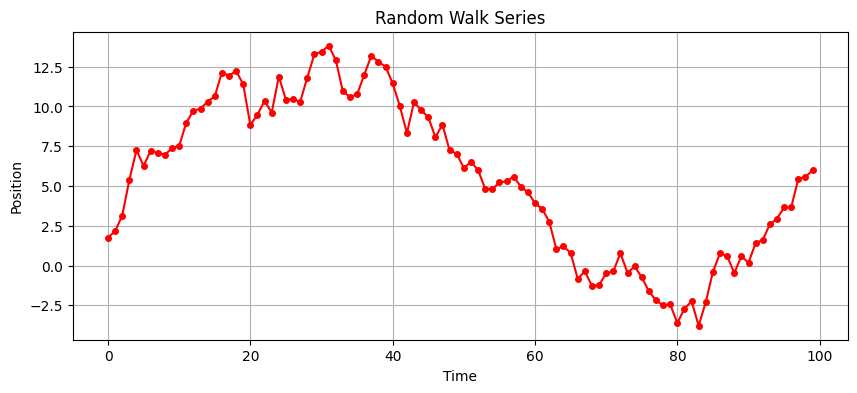

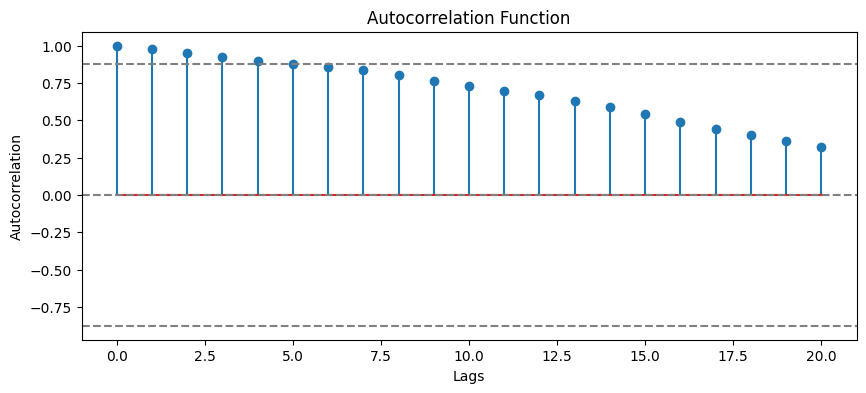

In [18]:
# Seed the random number generator for reproducibility
np.random.seed(0)

# Generate a random walk
random_steps = np.random.normal(0, 1, 100)  # Random steps with mean 0 and std dev 1
random_walk = np.cumsum(random_steps)  # Cumulative sum to simulate the walk

# Plotting the random walk
plt.figure(figsize=(10, 4))
plt.plot(random_walk, marker='o', linestyle='-', markersize=4, color='red')
plt.title('Random Walk Series')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()

# Checking for autocorrelation
lag_acf = sm.tsa.acf(random_walk, nlags=20, fft=True)  # Ensure fft=True for faster computation
plt.figure(figsize=(10, 4))
plt.stem(range(len(lag_acf)), lag_acf) 
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.show()


The provided graphs are typical illustrations of a random walk time series and its autocorrelation function (ACF).

- The **random walk plot** affirms that using past data to predict future values of a random walk is ineffective, as the position at each time point is largely determined by the random step taken from the last position.
- The **ACF plot** indicates that while there is a strong short-term correlation within the series, the predictability of future values based on past values declines as the lag increases. This is typical for random walks and suggests that detrending or differencing would be necessary to make the series stationary before applying many time series forecasting methods.
- For a **time series analysis pipeline**, this ACF characteristic would necessitate checking for unit roots or integrating orders to transform the series into a stationary one before proceeding with further analysis or model building.

## LLR Test

The LLR test is used in statistics to compare the fit of two models, typically a simpler (nested) model against a more complex one. Here is the code:

### Implementation

In [3]:
import numpy as np
from scipy.stats import chi2

def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    return p

This function takes two statistical models (`simple` and `complex`), fits them, and then computes the log-likelihoods (`.llf` is the log-likelihood function). 

The `DF` parameter represents the degrees of freedom, which typically equals the difference in the number of parameters between `complex` and `simple`. 

The function calculates the likelihood ratio, which is then used to compute the p-value from the chi-squared distribution (`chi2.sf` is the survival function, equivalent to 1 - CDF, of the chi-squared distribution). 

The result is a p-value that tells you whether the additional complexity of `complex` significantly improves the fit of the model compared to `simple`. If the p-value is less than a chosen significance level (usually 0.05), you would reject the null hypothesis that `simple` is true, indicating that `complex` provides a significantly better fit to the data.

### Degrees of Freedom

The degrees of freedom (DF) in the context of the Likelihood Ratio Test (LLR test) is the difference in the number of estimated parameters between the two models being compared.

For ARIMA models, the parameters are:

- The number of AR (autoregressive) terms (p)
- The number of differences (d)
- The number of MA (moving average) terms (q)

In an ARIMA(p, d, q) model, the total number of parameters is `p + q + 1` if a constant or trend term is included in the model, or `p + q` if it is not.

Let's think that complex model is the `ARIMA(4,1,2)` model, if a constant is included, there would be `4 (AR) + 2 (MA) + 1 (constant) = 7` parameters.

For the simple model `ARIMA(1,1,1)` model, again assuming a constant is included, there would be `1 (AR) + 1 (MA) + 1 (constant) = 3` parameters.

The degrees of freedom for the LLR test comparing these two models would then be the difference in the number of parameters:

DF = Parameters of ARIMA(4,1,2) - Parameters of ARIMA(1,1,1)
DF = 7 - 3
DF = 4

Therefore, it will be uses `DF = 4` for the LLR test between `ARIMA(4,1,2)` and `ARIMA(1,1,1)`. This represents the additional parameters that `ARIMA(4,1,2)` is using over `ARIMA(1,1,1)`.

### Nested vs Non-nested Models

For the Likelihood Ratio Test (LLR test) to be valid, the models being compared should ideally be nested. This means that one model is a special case of the other when certain parameters are set to zero.

Nested models typically have the following relationship:

- They are estimated on the same dataset.
- The more complex model (with more parameters) reduces to the simpler model under certain parameter restrictions (usually setting some parameters to zero).

Now, let's consider the `ARIMA(5,1,1)` and `ARIMA(2,1,4)` models:

- `ARIMA(5,1,1)` has 5 AR terms, 1 differencing term, and 1 MA term.
- `ARIMA(2,1,4)` has 2 AR terms, 1 differencing term, and 4 MA terms.

The number of parameters for each (assuming both have a constant term) is:

- For `ARIMA(5,1,1)`: 5 (AR) + 1 (MA) + 1 (constant) = 7 parameters
- For `ARIMA(2,1,4)`: 2 (AR) + 4 (MA) + 1 (constant) = 7 parameters

Since both models have the same number of parameters, they have the same degrees of freedom when it comes to comparing the estimated parameters. However, they are not nested models because `ARIMA(5,1,1)` cannot be reduced to `ARIMA(2,1,4)` or vice versa by just setting some parameters to zero. Each has different lag orders for the AR and MA components.

Therefore, a traditional LLR test may not be appropriate for comparing `ARIMA(5,1,1)` and `ARIMA(2,1,4)` because they are not nested. 

However, if you still wanted to compare models using some form of likelihood-based approach, you might look at other criteria like Akaike’s Information Criterion (AIC) or Bayesian Information Criterion (BIC), which are suitable for comparing non-nested models. They penalize the likelihood for the number of parameters, so the model with the lower AIC or BIC is considered better in terms of the trade-off between goodness-of-fit and complexity.

## Forecasting vs. Prediction

In the context of time series analysis, the terms "forecasting" and "prediction" are often used interchangeably, but they do have distinct meanings:

### Forecasting

Forecasting specifically refers to estimating future values of a time series based solely on past and present data. This process is inherently associated with time-dependent data. The key here is that forecasting assumes that the system's existing patterns and structures that were observed in the past will continue into the future. This is commonly seen in fields like meteorology, economics, and inventory management.

### Prediction

Prediction, on the other hand, involves estimating the values of a time series—or any dataset—based on a model that might incorporate a wide variety of inputs, including some that are not part of the time series itself. Predictions are not necessarily tied to time-dependent data. Predictive modeling can be used to forecast, but it can also be applied to classify or recognize patterns, among other tasks.

### Key Differences in Time Series Analysis

1. **Basis of Model**:
   - **Forecasting**: Uses past data of the variable itself to predict future values. Models like ARIMA (AutoRegressive Integrated Moving Average) is typical.
   - **Prediction**: Uses past data along with other variables to make predictions. This can include machine learning models that take multiple inputs like random forests or neural networks.

2. **Purpose**:
   - **Forecasting**: Typically aims to predict future data points in the same dataset.
   - **Prediction**: Aims to estimate an outcome which can be a future data point or a classification or any other type of output.

3. **Data Dependency**:
   - **Forecasting**: Heavily dependent on the time-series data's chronological integrity.
   - **Prediction**: Can be applied to all  types of data.

4. **Techniques**:
   - **Forecasting**: Often involves methods that emphasize trends, seasonality, and cyclic patterns.
   - **Prediction**: May involve complex algorithms that consider a wide array of data types and structures.